In [ ]:
import pickle
import numpy as np
import os
from torchvision.datasets import VisionDataset, CIFAR100
import numpy as np
import random
from collections import ChainMap


np.random.seed(1993) 
order = np.arange(100)
np.random.shuffle(order)
print(order)
label_map = {k: v for v, k in enumerate(order)}


lala=[order[10*x:10*(x+1)].tolist() for x in range(0, 10)]

print(lala)
print(label_map)
label_map_special = {}

for i in range(10):
  for j, w in enumerate(lala[i]):
    if w not in label_map_special:
      label_map_special[w] = j

assert 100 == len(list(label_map_special.keys()))

print(label_map_special)



train = CIFAR100('.data/', train=True, transform=None, download=True)
test = CIFAR100('.data/', train=False, transform=None, download=True)

class Cifar100:
    def __init__(self, train, test):
        self.train = train
        self.test = test
        self.train_groups, self.test_groups = self.split()
        self.batch_num = 10

    def split(self):
        train_groups = [[],[],[],[],[],[],[],[],[],[]]
        for data, target in self.train:
            if target in order[:10]:
                train_groups[0].append((data,target))
            elif target in order[10:20]:
                train_groups[1].append((data,target))
            elif target in order[20:30]:
                train_groups[2].append((data,target))
            elif target in order[30:40]:
                train_groups[3].append((data,target))
            elif target in order[40:50]:
                train_groups[4].append((data,target))
            elif target in order[50:60]:
                train_groups[5].append((data,target))
            elif target in order[60:70]:
                train_groups[6].append((data,target))
            elif target in order[70:80]:
                train_groups[7].append((data,target))
            elif target in order[80:90]:
                train_groups[8].append((data,target))
            elif target in order[90:100]:
                train_groups[9].append((data,target))
        assert len(train_groups[0]) == 5000, len(train_groups[0])
        assert len(train_groups[1]) == 5000, len(train_groups[1])
        assert len(train_groups[2]) == 5000, len(train_groups[2])
        assert len(train_groups[3]) == 5000, len(train_groups[3])
        assert len(train_groups[4]) == 5000, len(train_groups[4])
        assert len(train_groups[5]) == 5000, len(train_groups[5])
        assert len(train_groups[6]) == 5000, len(train_groups[6])
        assert len(train_groups[7]) == 5000, len(train_groups[7])
        assert len(train_groups[8]) == 5000, len(train_groups[8])
        assert len(train_groups[9]) == 5000, len(train_groups[9])



        test_groups = [[],[],[],[],[],[],[],[],[],[]]
        for data, target in self.test:
            if target in order[:10]:
                test_groups[0].append((data,target))
            elif target in order[10:20]:
                test_groups[1].append((data,target))
            elif target in order[20:30]:
                test_groups[2].append((data,target))
            elif target in order[30:40]:
                test_groups[3].append((data,target))
            elif target in order[40:50]:
                test_groups[4].append((data,target))
            elif target in order[50:60]:
                test_groups[5].append((data,target))
            elif target in order[60:70]:
                test_groups[6].append((data,target))
            elif target in order[70:80]:
                test_groups[7].append((data,target))
            elif target in order[80:90]:
                test_groups[8].append((data,target))
            elif target in order[90:100]:
                test_groups[9].append((data,target))
        assert len(test_groups[0]) == 1000
        assert len(test_groups[1]) == 1000
        assert len(test_groups[2]) == 1000
        assert len(test_groups[3]) == 1000
        assert len(test_groups[4]) == 1000
        assert len(test_groups[5]) == 1000
        assert len(test_groups[6]) == 1000
        assert len(test_groups[7]) == 1000
        assert len(test_groups[8]) == 1000
        assert len(test_groups[9]) == 1000

        return train_groups, test_groups

    def next_classes_batch(self, i):
        return self.train_groups[i], self.test_groups[i]

if __name__ == "__main__":
    cifar = Cifar100(train, test)
    print(len(cifar.train_groups[0]))

[68 56 78  8 23 84 90 65 74 76 40 89  3 92 55  9 26 80 43 38 58 70 77  1
 85 19 17 50 28 53 13 81 45 82  6 59 83 16 15 44 91 41 72 60 79 52 20 10
 31 54 37 95 14 71 96 98 97  2 64 66 42 22 35 86 24 34 87 21 99  0 88 27
 18 94 11 12 47 25 30 46 62 69 36 61  7 63 75  5 32  4 51 48 73 93 39 67
 29 49 57 33]
[[68, 56, 78, 8, 23, 84, 90, 65, 74, 76], [40, 89, 3, 92, 55, 9, 26, 80, 43, 38], [58, 70, 77, 1, 85, 19, 17, 50, 28, 53], [13, 81, 45, 82, 6, 59, 83, 16, 15, 44], [91, 41, 72, 60, 79, 52, 20, 10, 31, 54], [37, 95, 14, 71, 96, 98, 97, 2, 64, 66], [42, 22, 35, 86, 24, 34, 87, 21, 99, 0], [88, 27, 18, 94, 11, 12, 47, 25, 30, 46], [62, 69, 36, 61, 7, 63, 75, 5, 32, 4], [51, 48, 73, 93, 39, 67, 29, 49, 57, 33]]
{68: 0, 56: 1, 78: 2, 8: 3, 23: 4, 84: 5, 90: 6, 65: 7, 74: 8, 76: 9, 40: 10, 89: 11, 3: 12, 92: 13, 55: 14, 9: 15, 26: 16, 80: 17, 43: 18, 38: 19, 58: 20, 70: 21, 77: 22, 1: 23, 85: 24, 19: 25, 17: 26, 50: 27, 28: 28, 53: 29, 13: 30, 81: 31, 45: 32, 82: 33, 6: 34, 59: 35, 83: 36, 1

In [ ]:
import numpy as np
import os
from PIL import Image
from torch.utils.data import Dataset
import skimage.io as io
import glob
import numpy as np
import random
import torch

class BatchData(Dataset):
    def __init__(self, images, labels, special_map=None, input_transform=None):
        self.images = images
        self.labels = labels
        self.input_transform = input_transform
        self.special_map = special_map

    def __getitem__(self, index):
        image = self.images[index]
        image = Image.fromarray(np.uint8(image))
        label = self.labels[index]
        if self.special_map is not None:
          label = label_map_special[label]
        else:  
          label = label_map[label]
        if self.input_transform is not None:
          image = self.input_transform(image)
        
        label = torch.LongTensor([label])
        return image, label

    def __len__(self):
        return len(self.images)

In [ ]:
class Exemplar:
    def __init__(self, max_size, total_cls):
        self.train = {}
        self.cur_cls = 0
        self.max_size = max_size
        self.total_classes = total_cls
        self.store_num = {}
        self.count_train = {}

    def update(self, cls_num, train, inc_i):
        train_x, train_y = train
        cur_keys = list(set(train_y))
        print(cur_keys)
        def countX(tup, x): 
            count = 0
            for ele in tup: 
              if (ele == x): 
                count = count + 1
            return count 
        
        self.cur_cls = cls_num

        for i in order[inc_i*10: 10*(inc_i+1)]:      # cambia range ad ogni step
            self.count_train[i] = countX(train_y, i)     
            self.store_num[i] = int(self.count_train[i] / ((self.cur_cls)*0.1))

        
        total_store_num = self.max_size / self.cur_cls #if self.cur_cls != 0 else max_size
        train_store_num = int(total_store_num)  # ha senso?

        for x, y in zip(train_x, train_y):
            if y not in self.train:
                self.train[y] = [x]
            else:
                #if len(self.train[y]) < self.store_num[y]:
                if len(self.train[y]) < train_store_num:
                    self.train[y].append(x)
        assert self.cur_cls == len(list(self.train.keys()))
        
        for key, value in self.train.items():
            #self.store_num[key] = int(self.count_train[key] / ((self.cur_cls)*0.1))
            #self.train[key] = value[:self.store_num[key]]
            self.train[key] = value[:train_store_num]
        for key, value in self.train.items():
            #assert len(self.train[key]) == self.store_num[key]
            assert len(self.train[key]) <= train_store_num


    def get_exemplar_train(self):
        exemplar_train_x = []
        exemplar_train_y = []
        for key, value in self.train.items():
            for train_x in value:
                exemplar_train_x.append(train_x)
                exemplar_train_y.append(key)
        return exemplar_train_x, exemplar_train_y

In [ ]:
import os
import os.path
import torchvision
import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.utils.data.dataloader import default_collate

In [ ]:
import torch.nn as nn
import math
import torch.utils.model_zoo as model_zoo

"""
Credits to @hshustc
Taken from https://github.com/hshustc/CVPR19_Incremental_Learning/tree/master/cifar100-class-incremental
"""


def conv3x3(in_planes, out_planes, stride=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)

class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride,
                               padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, planes * self.expansion, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out


class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes):
        self.old_model = None
        self.num_classes = num_classes
        self.inplanes = 16
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self._make_layer(block, 16, layers[0])
        self.layer2 = self._make_layer(block, 32, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 64, layers[2], stride=2)
        self.avgpool = nn.AvgPool2d(8, stride=1)
        self.fc = nn.Linear(64 * block.expansion, self.num_classes)
  

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x, features=False):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        
        if features:
            x = x / x.norm()
        else:
            x = self.fc(x)

        return x
        
def resnet20(pretrained=False, **kwargs):
    n = 3
    model = ResNet(BasicBlock, [n, n, n], **kwargs)
    return model

def resnet32(pretrained=False, **kwargs):
    n = 5
    model = ResNet(BasicBlock, [n, n, n], **kwargs)
    return model

def resnet56(pretrained=False, **kwargs):
    n = 9
    model = ResNet(Bottleneck, [n, n, n], **kwargs)
    return model

In [ ]:
import torch
import torchvision
from torchvision.models import vgg16
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.transforms import Compose, CenterCrop, Normalize, Scale, Resize, ToTensor, ToPILImage
from torch.optim.lr_scheduler import LambdaLR, StepLR, MultiStepLR
from torch.nn import BCEWithLogitsLoss, CrossEntropyLoss    
from sklearn.svm import NuSVC, SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
import dml
from dml.ncmc import NCMC_Classifier

import numpy as np
import glob
import PIL.Image as Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
import json
import pickle
from copy import deepcopy

def weight_reset(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        m.reset_parameters()

class Trainer:
    def __init__(self, total_cls):
        self.total_cls = total_cls
        self.seen_cls = 0
        self.dataset = Cifar100(train, test)
        self.model = resnet32(num_classes = total_cls).cuda()

        self.means = {}
        transform_train = [
            transforms.RandomCrop(32, padding=4),
            transforms.RandomHorizontalFlip(),
        ]
        transform_train.extend([
            transforms.ToTensor(),
            transforms.Normalize((0.4914, 0.4822, 0.4465),
                                 (0.2023, 0.1994, 0.2010)),
        ])
        self.input_transform = Compose(transform_train)
        
        self.input_transform_eval = Compose([
                                ToTensor(),
                                Normalize((0.4914, 0.4822, 0.4465),
                                 (0.2023, 0.1994, 0.2010))])
        total_params = sum(p.numel() for p in self.model.parameters() if p.requires_grad)
        print("Solver total trainable parameters : ", total_params)


    def test(self, testdata):
        # print("test data number : ",len(testdata))
        self.model.eval()
        count = 0
        correct = 0
        wrong = 0
        with torch.no_grad():
          for i, (image, label) in enumerate(testdata):
              image = image.cuda()
              label = label.view(-1).cuda()
              p = self.model(image)
              pred = p[:,:self.seen_cls].argmax(dim=-1)
              correct += sum(pred == label).item()
              wrong += sum(pred != label).item()
        acc = correct / (wrong + correct)
        print(f"\r Test Acc: {acc*100} \n")
        return acc

    def NMEClassifier(self, test_loader, train_loader):
      self.model.eval()

      with torch.no_grad():
        for i in range(self.seen_cls-10,self.seen_cls):
          t=0
          mean = torch.zeros((1,64),device='cuda')
          for indices,(images,labels) in enumerate((train_loader)):
            images = images.to('cuda')
            outputs = self.model(images,features=True)
            for output,key in zip(outputs,labels):
              if i==key:
                mean+=output
                t+=1
          mean = mean/t
          self.means[i] = mean / mean.norm()
        correct = 0.0

        for _, (images, labels) in enumerate((test_loader)):
          images = images.to('cuda')
          outputs = self.model(images,features=True)
          preds = []
          for output in outputs:
            pred = None
            min_dist = 10000000
            for key in self.means:
              dist = torch.dist(self.means[key],output)
              if dist < min_dist:
                min_dist = dist
                pred = key
            preds.append(pred)
      
          for label, pred in zip(labels,preds):
            if label == pred:
              correct += 1
        acc = correct/(self.seen_cls*100)
        print(f'NME Accuracy: {acc} \n*****************\n')
      return acc

    def SVMClassifier(self,test_loader,train_loader,centroids):
      self.model.eval()
      x_train=[]
      y_train=[]
      x_test=[]
      y_test=[]
      with torch.no_grad():
        for i, (images, labels) in enumerate((train_loader)):
          images = images.to('cuda')
          with torch.no_grad():
            outputs = self.model(images,features=True)
            for output,label in zip(outputs,labels):
              x_train.append(np.array(output.to('cpu')))
              y_train.append(np.array(label))
        norm = MinMaxScaler() # Normalization for the test phase.

        norm.fit(x_train)
        x_train = norm.transform(x_train)

        n_correct = 0.0
        for i, (images, labels) in enumerate((test_loader)):
          images = images.to('cuda')
          with torch.no_grad():
            outputs = self.model(images,features=True)
            for output,label in zip(outputs,labels):
              x_test.append(np.array(output.to('cpu')))
              y_test.append(np.array(label))
              
        x_test = norm.transform(x_test)
      svc = SVC(random_state=42, C=1)
      svc.fit(x_train, y_train)
      y_pred=svc.predict(x_test)
      acc1 = accuracy_score(y_test, y_pred)
      print(f'accuracy SVC:{acc1}')
      return acc1

    def get_lr(self, optimizer):
        for param_group in optimizer.param_groups:
            return param_group['lr']

    def train(self, batch_size, epoches, lr, max_size):
        total_cls = self.total_cls
        criterion = CrossEntropyLoss()
        # criterion = BCEWithLogitsLoss()

        previous_model = None
        exemplar = Exemplar(max_size, total_cls)
        dataset = self.dataset
        test_xs = []
        test_ys = []
        train_xs = []
        train_ys = []

        test_accs = []
        for inc_i in range(dataset.batch_num):
            print(50*'---')
            print(" Incremental batch num: " , inc_i)
            train, test = dataset.next_classes_batch(inc_i)
            print(len(train), len(test))
            train_x, train_y = zip(*train)
            test_x, test_y = zip(*test)
            test_xs.extend(test_x)
            test_ys.extend(test_y)
 

            self.seen_cls = (total_cls//dataset.batch_num)*(inc_i + 1)
            print("Seen cls number: ", self.seen_cls)

            if inc_i > 0:
               train_xs, train_ys = exemplar.get_exemplar_train()
               ex_data = DataLoader(BatchData(train_xs, train_ys, input_transform=self.input_transform), batch_size=256, shuffle=False, drop_last=True)


            
            train_xs.extend(train_x)
            train_ys.extend(train_y)                              
    

            train_data = DataLoader(BatchData(train_xs, train_ys, input_transform=self.input_transform),
                        batch_size=batch_size, shuffle=True, drop_last=True)
            test_data = DataLoader(BatchData(test_xs, test_ys, input_transform=self.input_transform_eval),
                        batch_size=batch_size, shuffle=False)

            optimizer = optim.SGD(self.model.parameters(), lr=0.1, momentum=0.9,  weight_decay=2e-4)
            scheduler = MultiStepLR(optimizer, milestones=[40, 60], gamma=0.2)


            test_acc = []
            

            for epoch in range(epoches):
                cur_lr = self.get_lr(optimizer)
                print(f"\r EPOCH:{epoch}, LR:{cur_lr}", end='')
                if inc_i > 0:
                   self.distill(train_data, criterion, optimizer, inc_i)
                   scheduler.step()
                else:
                   self.stage_1(train_data, criterion, optimizer)
                   scheduler.step()

            self.previous_model = deepcopy(self.model)
            if inc_i > 0:
              acc1 = self.SVMClassifier(test_data,train_data)
              acc = self.NMEClassifier(test_data,train_data)
              acc2 = self.NCMC(test_data,train_data,centroids = self.seen_cls)
            else:
              acc = self.test(test_data)
            test_acc.append(acc)
            test_accs.append(max(test_acc))
            print(test_accs)
            
            x_ex, y_ex = self.exemplar_selection(train_x, train_y, inc_i)   
            exemplar.update(self.seen_cls, (x_ex, y_ex), inc_i)


         
        fig, ax = plt.subplots()
        line1 = ax.plot(range(1, len(test_accs)+1), test_accs, label = 'Test accuracy')
        ax.set(xlabel='N. Classes')
        ax.grid()
        ax.legend()
        plt.show()

    def cod_one_hot(self, x):
        batch_size = 128
        y_one_hot = torch.zeros(len(x), self.seen_cls).cuda()
        y_one_hot = y_one_hot.scatter(1,x.long().view(-1,1).cuda(),1).cuda()
        return y_one_hot

    def cod_one_hot_special(self, x):
        batch_size = 128
        y_one_hot = torch.zeros(len(x), 10).cuda()
        y_one_hot = y_one_hot.scatter(1,x.long().view(-1,1).cuda(),1).cuda()
        return y_one_hot


    def stage_1(self, train_data, criterion, optimizer):
        self.model.train()
        print(f"\r Training new classes... ", end='')
        losses = []
        for i, (image, label) in enumerate((train_data)):
            image = image.cuda()
            label = label.view(-1).cuda() 
            # label = self.cod_one_hot(label)
            p = self.model(image)
            loss = criterion(p[:,:self.seen_cls], label)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
        print(f"\r stage1 loss: {np.mean(losses)} \n", end='')

    def exemplar_selection(self, train_x, train_y,inc_i):
        print(f"\r Selcting exemplars... ", end='')
        train_data_special = DataLoader(BatchData(train_x, train_y, input_transform=self.input_transform),
                        batch_size=128, shuffle=False, drop_last=True)
        self.model.eval()
        X_train=[]
        y_train=[]
        with torch.no_grad():
          for i, (images, labels) in enumerate((train_data_special)):
             images = images.to('cuda')
             outputs = self.model(images, features=True)   #doppia normalizzazione?
             for output, label in zip(outputs, labels):
                X_train.append(np.array(output.to('cpu')))
                y_train.append(np.array(label))
          norm = MinMaxScaler() # Normalization 

          norm.fit(X_train)
          X_train = norm.transform(X_train)
          if inc_i > 0:
            svc = SVC(random_state=42, C=0.4)
          else:
            svc = SVC(random_state=42, C=0.04)
          mod = svc.fit(X_train, y_train)
          mod.support_vectors_
          mod.support_
          mod.n_support_
          X_exemplars = []
          y_exemplars = []
          for i in range(sum(mod.n_support_)):
            X_exemplars.append(train_x[int(mod.support_[i])])
            y_exemplars.append(train_y[int(mod.support_[i])])
          print(f'Number support vectors per class:{mod.n_support_}')
          #print(f'Index of support vector per class:{mod.support_}')
          print(f'Number support vectors:{sum(mod.n_support_)}')
        return X_exemplars, y_exemplars

    def distill(self, train_data, criterion, optimizer, inc_i):
        self.model.train()
        print(f"\r Training ... ", end='')
        distill_losses = []
        for i, (image, label) in enumerate((train_data)):
            image = image.cuda()
            label = label.view(-1).cuda()
            # label = self.cod_one_hot(label)
            p = self.model(image)
            with torch.no_grad():
                pre_p = self.previous_model(image)
            pre_p = F.softmax(pre_p[:,:self.seen_cls-10], dim=1)
            logp = F.log_softmax(p[:,:self.seen_cls-10], dim=1)
            dist_loss = -torch.mean(torch.sum(pre_p * logp, dim=1))-10:self.seen_cls]), 1)
            loss_class = CrossEntropyLoss()(p[:,:self.seen_cls], label)
            loss = loss_class + dist_loss
            optimizer.zero_grad()
            loss.backward(retain_graph=True)
            optimizer.step()
            distill_losses.append(loss.item())
        print(f"\r distill and bce loss: {np.mean(distill_losses)}\n",end='')

Solver total trainable parameters :  472756
------------------------------------------------------------------------------------------------------------------------------------------------------
 Incremental batch num:  0
5000 1000
Seen cls number:  10
 stage1 loss: 2.252383082340925 
 stage1 loss: 1.7470086751840053 
 stage1 loss: 1.507839554395431 
 stage1 loss: 1.380744607020647 
 stage1 loss: 1.264107046983181 
 stage1 loss: 1.216196093803797 
 stage1 loss: 1.127125356441889 
 stage1 loss: 1.0831555357346168 
 stage1 loss: 0.9986807428873502 
 stage1 loss: 0.9263501320129786 
 stage1 loss: 0.875148491981702 
 stage1 loss: 0.866979962740189 
 stage1 loss: 0.7678204346925784 
 stage1 loss: 0.7175045487208244 
 stage1 loss: 0.6729083305750138 
 stage1 loss: 0.6426067780225705 
 stage1 loss: 0.6245269668407929 
 stage1 loss: 0.5780696509740292 
 stage1 loss: 0.5522309641043345 
 stage1 loss: 0.525439570347468 
 stage1 loss: 0.4888074245208349 
 stage1 loss: 0.46032925293995786 
 stage1

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number support vectors per class:[187 184 301 239 192 294 274 312 302 215]
Number support vectors:2500
[65, 68, 8, 74, 76, 78, 84, 23, 56, 90]
------------------------------------------------------------------------------------------------------------------------------------------------------
 Incremental batch num:  1
5000 1000
Seen cls number:  20
 distill and bce loss: 3.118892047140333
 distill and bce loss: 2.5297059968665794
 distill and bce loss: 2.371169059364884
 distill and bce loss: 2.269573692922239
 distill and bce loss: 2.1453844330928944
 distill and bce loss: 2.0760017500983343
 distill and bce loss: 1.9754914001182273
 distill and bce loss: 1.9785783776530512
 distill and bce loss: 1.9092042688970212
 distill and bce loss: 1.86111628346973
 distill and bce loss: 1.7993815651646368
 distill and bce loss: 1.7953658766216702
 distill and bce loss: 1.7691217837510285
 distill and bce loss: 1.7342716411308006
 distill and bce loss: 1.6919841545599479
 distill and bce loss: 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy SVC:0.7325
NME Accuracy: 0.7415 
*****************

[0.882, 0.7415]
 Selcting exemplars... 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number support vectors per class:[217 150 260 142 294 179 216 253 201 249]
Number support vectors:2161
[3, 38, 40, 9, 43, 80, 55, 89, 26, 92]
------------------------------------------------------------------------------------------------------------------------------------------------------
 Incremental batch num:  2
5000 1000
Seen cls number:  30
 distill and bce loss: 3.408705464115849
 distill and bce loss: 2.342086566819085
 distill and bce loss: 2.182819949256049
 distill and bce loss: 2.085913090794175
 distill and bce loss: 1.9398681035748235
 distill and bce loss: 1.9263401914525915
 distill and bce loss: 1.8409158057636685
 distill and bce loss: 1.7802201641930475
 distill and bce loss: 1.786618517504798
 distill and bce loss: 1.702949532756099
 distill and bce loss: 1.689881717717206
 distill and bce loss: 1.6795676703806277
 distill and bce loss: 1.653063138326009
 distill and bce loss: 1.6069715773617779
 distill and bce loss: 1.584076088887674
 distill and bce loss: 1.562

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy SVC:0.6436666666666667
NME Accuracy: 0.6976666666666667 
*****************

[0.882, 0.7415, 0.6976666666666667]
 Selcting exemplars... 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number support vectors per class:[152 172 196 208 164 211 124 210 200 156]
Number support vectors:1793
[1, 70, 77, 17, 50, 19, 85, 53, 58, 28]
------------------------------------------------------------------------------------------------------------------------------------------------------
 Incremental batch num:  3
5000 1000
Seen cls number:  40
 distill and bce loss: 3.453489550837764
 distill and bce loss: 2.3746234443452625
 distill and bce loss: 2.1938065422905817
 distill and bce loss: 2.124982844900202
 distill and bce loss: 2.051320963435703
 distill and bce loss: 1.9853823516103957
 distill and bce loss: 1.940045021198414
 distill and bce loss: 1.8967173408578943
 distill and bce loss: 1.8661680155330234
 distill and bce loss: 1.8432096331207841
 distill and bce loss: 1.8398107709708038
 distill and bce loss: 1.7712375941099945
 distill and bce loss: 1.7252598912627608
 distill and bce loss: 1.7320711921762537
 distill and bce loss: 1.6845985540637263
 distill and bce loss:

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy SVC:0.5205
NME Accuracy: 0.624 
*****************

[0.882, 0.7415, 0.6976666666666667, 0.624]
 Selcting exemplars... 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number support vectors per class:[203 198 305 185 263 174 216 220 191 243]
Number support vectors:2198
[6, 44, 45, 13, 15, 16, 81, 82, 83, 59]
------------------------------------------------------------------------------------------------------------------------------------------------------
 Incremental batch num:  4
5000 1000
Seen cls number:  50
 distill and bce loss: 3.254097788422196
 distill and bce loss: 2.1311866133301347
 distill and bce loss: 1.9856960927998577
 distill and bce loss: 1.8862862123383417
 distill and bce loss: 1.82649235813706
 distill and bce loss: 1.7853614599616439
 distill and bce loss: 1.7269755910944056
 distill and bce loss: 1.743011596026244
 distill and bce loss: 1.68942497615461
 distill and bce loss: 1.6308040574744895
 distill and bce loss: 1.6504127206625763
 distill and bce loss: 1.6363374061054654
 distill and bce loss: 1.5936880751892373
 distill and bce loss: 1.571196229369552
 distill and bce loss: 1.578847465691743
 distill and bce loss: 1.5

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy SVC:0.4674
NME Accuracy: 0.5952 
*****************

[0.882, 0.7415, 0.6976666666666667, 0.624, 0.5952]
 Selcting exemplars... 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number support vectors per class:[191 185 257 105 216  97 160 221 174 191]
Number support vectors:1797
[72, 41, 10, 79, 52, 20, 54, 91, 60, 31]
------------------------------------------------------------------------------------------------------------------------------------------------------
 Incremental batch num:  5
5000 1000
Seen cls number:  60
 distill and bce loss: 3.365884047967416
 distill and bce loss: 2.4716462117654308
 distill and bce loss: 2.3043333689371743
 distill and bce loss: 2.1519201221289457
 distill and bce loss: 2.0879638150886253
 distill and bce loss: 2.0438124780301696
 distill and bce loss: 1.9968000385496352
 distill and bce loss: 1.9434442475990013
 distill and bce loss: 1.8921162375697382
 distill and bce loss: 1.8891604653111211
 distill and bce loss: 1.8910046175674156
 distill and bce loss: 1.8914706684924938
 distill and bce loss: 1.8316051099035475
 distill and bce loss: 1.8036814199553595
 distill and bce loss: 1.7726452902511314
 distill and bce l

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy SVC:0.3943333333333333
NME Accuracy: 0.5506666666666666 
*****************

[0.882, 0.7415, 0.6976666666666667, 0.624, 0.5952, 0.5506666666666666]
 Selcting exemplars... 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number support vectors per class:[157 186 224 113 140 254 234 243 285 214]
Number support vectors:2050
[96, 97, 98, 2, 64, 37, 66, 71, 14, 95]
------------------------------------------------------------------------------------------------------------------------------------------------------
 Incremental batch num:  6
5000 1000
Seen cls number:  70
 distill and bce loss: 3.505869419486434
 distill and bce loss: 2.437945246696472
 distill and bce loss: 2.2336152019324125
 distill and bce loss: 2.15484669914952
 distill and bce loss: 2.008711850201642
 distill and bce loss: 1.9820825413421348
 distill and bce loss: 1.9349105556805928
 distill and bce loss: 1.8726396958033245
 distill and bce loss: 1.9267179369926453
 distill and bce loss: 1.830578362500226
 distill and bce loss: 1.8036262812437835
 distill and bce loss: 1.8135176610063624
 distill and bce loss: 1.7622901576536674
 distill and bce loss: 1.735177300594471
 distill and bce loss: 1.7190342545509338
 distill and bce loss: 1.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy SVC:0.3525714285714286
NME Accuracy: 0.5202857142857142 
*****************

[0.882, 0.7415, 0.6976666666666667, 0.624, 0.5952, 0.5506666666666666, 0.5202857142857142]
 Selcting exemplars... 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number support vectors per class:[194 257 230 239 184 218 183 208 235 131]
Number support vectors:2079
[0, 34, 35, 99, 42, 21, 86, 22, 24, 87]
------------------------------------------------------------------------------------------------------------------------------------------------------
 Incremental batch num:  7
5000 1000
Seen cls number:  80
 distill and bce loss: 3.4736189753920943
 distill and bce loss: 2.3327583339479236
 distill and bce loss: 2.1648342278268604
 distill and bce loss: 2.101125591331058
 distill and bce loss: 1.9753517066990887
 distill and bce loss: 1.9200021514186152
 distill and bce loss: 1.884809390262321
 distill and bce loss: 1.8646879549379702
 distill and bce loss: 1.838862348485876
 distill and bce loss: 1.8124935538680464
 distill and bce loss: 1.8136457867092557
 distill and bce loss: 1.7785928028601188
 distill and bce loss: 1.7398519251081679
 distill and bce loss: 1.6986931142983612
 distill and bce loss: 1.7151075292516638
 distill and bce loss

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy SVC:0.28275
NME Accuracy: 0.473125 
*****************

[0.882, 0.7415, 0.6976666666666667, 0.624, 0.5952, 0.5506666666666666, 0.5202857142857142, 0.473125]
 Selcting exemplars... 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number support vectors per class:[182 239 266 137 256 217 122 265 186 266]
Number support vectors:2136
[11, 12, 46, 47, 18, 30, 88, 25, 27, 94]
------------------------------------------------------------------------------------------------------------------------------------------------------
 Incremental batch num:  8
5000 1000
Seen cls number:  90
 distill and bce loss: 3.530776346171344
 distill and bce loss: 2.4625484855086714
 distill and bce loss: 2.281572527355618
 distill and bce loss: 2.177029110767223
 distill and bce loss: 2.124586820602417
 distill and bce loss: 2.0704288019074335
 distill and bce loss: 2.0296633927910417
 distill and bce loss: 1.9845779207017686
 distill and bce loss: 1.901221114176291
 distill and bce loss: 1.9163219663831923
 distill and bce loss: 1.8898346181269046
 distill and bce loss: 1.8404405183262296
 distill and bce loss: 1.848975830607944
 distill and bce loss: 1.8360572655995686
 distill and bce loss: 1.806904011302524
 distill and bce loss: 1

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy SVC:0.26122222222222224
NME Accuracy: 0.4474444444444444 
*****************

[0.882, 0.7415, 0.6976666666666667, 0.624, 0.5952, 0.5506666666666666, 0.5202857142857142, 0.473125, 0.4474444444444444]
 Selcting exemplars... 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number support vectors per class:[166 167 236 194 247 235 197 201 301 273]
Number support vectors:2217
[32, 36, 69, 5, 7, 4, 75, 61, 62, 63]
------------------------------------------------------------------------------------------------------------------------------------------------------
 Incremental batch num:  9
5000 1000
Seen cls number:  100
 distill and bce loss: 3.8898439230742277
 distill and bce loss: 2.6954109845338046
 distill and bce loss: 2.5324892821135343
 distill and bce loss: 2.3861313351878413
 distill and bce loss: 2.3243567016389637
 distill and bce loss: 2.304361895278648
 distill and bce loss: 2.2199422937852367
 distill and bce loss: 2.176952044169108
 distill and bce loss: 2.1705227251406067
 distill and bce loss: 2.126951486976058
 distill and bce loss: 2.0837407377031116
 distill and bce loss: 2.0922430908238447
 distill and bce loss: 2.0903013481034174
 distill and bce loss: 2.0334396914199546
 distill and bce loss: 2.0156426672582275
 distill and bce loss:

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy SVC:0.2156
NME Accuracy: 0.4188 
*****************

[0.882, 0.7415, 0.6976666666666667, 0.624, 0.5952, 0.5506666666666666, 0.5202857142857142, 0.473125, 0.4474444444444444, 0.4188]
 Selcting exemplars... 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number support vectors per class:[289 159 278 319 256 302 240 196 198 237]
Number support vectors:2474
[33, 67, 39, 73, 48, 49, 29, 51, 57, 93]


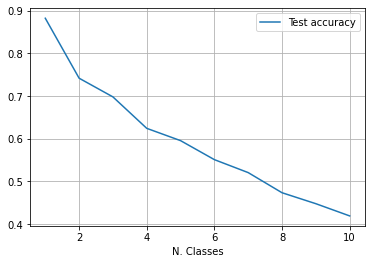

In [ ]:
import torch
import numpy as np
import sys
from torch.utils import *
import argparse
from torch.backends import cudnn
cudnn.benchmark


parser = argparse.ArgumentParser(description='Incremental Learning BIC')
parser.add_argument('--batch_size', default = 128, type = int)
parser.add_argument('--epoch', default = 70, type = int)
parser.add_argument('--lr', default = 0.2, type = int)
parser.add_argument('--max_size', default = 2000, type = int)
parser.add_argument('--total_cls', default = 100, type = int)

args = parser.parse_args(args=[])

trainer = Trainer(args.total_cls)
trainer.train(args.batch_size, args.epoch, args.lr, args.max_size)